In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "/content/sample_data/"
df_train = pd.read_csv(path + 'TRAIN.csv')
df_test = pd.read_csv(path + 'TEST.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_test.shape

(305163, 7)

In [ ]:
df_train.shape

(712046, 9)

## Reduce 0's from trainset

In [ ]:
# Reduce huge number of 0's in df_train

#df_train['Sales'].value_counts()

In [ ]:
df_train['Customers'].value_counts()

0       122097
560       1670
603       1663
539       1641
550       1640
         ...  
3149         1
4440         1
4174         1
4582         1
3484         1
Name: Customers, Length: 3956, dtype: int64

In [ ]:
df_train = df_train.sample(frac = 1)

In [ ]:
filterzeros = df_train[df_train['Customers'] == 0][:5000]

In [ ]:
filterzeros['Customers'].value_counts()

0    5000
Name: Customers, dtype: int64

In [ ]:
df_train = df_train[df_train['Customers']!=0]

In [ ]:
xdf = pd.concat([df_train, filterzeros])

In [ ]:
#xdf = df_train.copy()

In [ ]:
xdf['Customers'].quantile(0.0)

0.0

In [ ]:
xdf['Customers'].describe()

count    594949.000000
mean        763.540643
std         408.360156
min           0.000000
25%         522.000000
50%         679.000000
75%         897.000000
max        5494.000000
Name: Customers, dtype: float64

In [ ]:
xdf['Customers'].value_counts()

0       5000
560     1670
603     1663
539     1641
550     1640
        ... 
3149       1
4440       1
4174       1
4582       1
3484       1
Name: Customers, Length: 3956, dtype: int64

In [ ]:
xdf = xdf.sample(frac = 1)
xdf = xdf.iloc[:305163]

In [ ]:
xdf['Customers'].value_counts()

0       2578
560      888
576      853
566      853
539      850
        ... 
3531       1
4297       1
3674       1
3530       1
3640       1
Name: Customers, Length: 3643, dtype: int64

In [ ]:
xdf.shape

(305163, 9)

In [ ]:
df_test.shape

(305163, 7)

In [ ]:
df_test.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1


# Observe Dataset

In [ ]:
xdf.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
593214,820,4,2014-01-16,8839,944,1,0,0,0
296990,926,2,2014-10-28,5200,433,1,0,0,0
359001,169,5,2014-08-22,6073,609,1,1,0,0
1071,1072,5,2015-07-31,10270,817,1,1,0,1
709455,1101,5,2013-10-04,10184,1054,1,0,0,1


In [ ]:
# Extract year, month and day from 'Date'

In [ ]:
xdf['Date']

593214    2014-01-16
296990    2014-10-28
359001    2014-08-22
1071      2015-07-31
709455    2013-10-04
             ...    
15275     2015-07-18
321923    2014-10-01
354243    2014-08-27
640113    2013-12-05
603476    2014-01-07
Name: Date, Length: 305163, dtype: object

In [ ]:
xdf['Date'] = pd.to_datetime(xdf['Date'])
df_test['Date'] = pd.to_datetime(df_test['Date'])

In [ ]:
xdf['Date']

593214   2014-01-16
296990   2014-10-28
359001   2014-08-22
1071     2015-07-31
709455   2013-10-04
            ...    
15275    2015-07-18
321923   2014-10-01
354243   2014-08-27
640113   2013-12-05
603476   2014-01-07
Name: Date, Length: 305163, dtype: datetime64[ns]

In [ ]:
xdf['Year'] = xdf['Date'].dt.year
xdf['Month'] = xdf['Date'].dt.month
xdf['Day'] = xdf['Date'].dt.day


df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Day'] = df_test['Date'].dt.day


In [ ]:
xdf.drop('Date', axis = 1, inplace = True)
df_test.drop('Date', axis = 1, inplace = True)

In [ ]:
xdf.shape

(305163, 11)

In [ ]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305163 entries, 593214 to 603476
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          305163 non-null  int64 
 1   DayOfWeek      305163 non-null  int64 
 2   Sales          305163 non-null  int64 
 3   Customers      305163 non-null  int64 
 4   Open           305163 non-null  int64 
 5   Promo          305163 non-null  int64 
 6   StateHoliday   305163 non-null  object
 7   SchoolHoliday  305163 non-null  int64 
 8   Year           305163 non-null  int64 
 9   Month          305163 non-null  int64 
 10  Day            305163 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 27.9+ MB


In [ ]:
xdf['StateHoliday'].values

array(['0', '0', 0, ..., 0, '0', '0'], dtype=object)

In [ ]:
xdf['StateHoliday'].value_counts()

0    246187
0     58164
a       552
b       144
c       116
Name: StateHoliday, dtype: int64

In [ ]:
df_test['StateHoliday'].value_counts()

0    297219
a      5714
b      2230
Name: StateHoliday, dtype: int64

In [ ]:
xdf['StateHoliday'] = xdf['StateHoliday'].replace({'0':'0','a':'1','b':'1','c':'1'})

In [ ]:
xdf['StateHoliday'].value_counts()

0    246187
0     58164
1       812
Name: StateHoliday, dtype: int64

In [ ]:
df_test['StateHoliday'] = df_test['StateHoliday'].replace({'a':'1','b':'1'})

In [ ]:
xdf['StateHoliday'] = pd.to_numeric(xdf['StateHoliday'])

In [ ]:
df_test['StateHoliday'] = pd.to_numeric(df_test['StateHoliday'])

In [ ]:
# let's recheck 

xdf['StateHoliday'].value_counts()

0    304351
1       812
Name: StateHoliday, dtype: int64

In [ ]:
df_test['StateHoliday'].value_counts()

0    297219
1      7944
Name: StateHoliday, dtype: int64

This need to be converted to Numeric and fixed.

In [ ]:
# school holiday

xdf['SchoolHoliday'].value_counts()

0    248948
1     56215
Name: SchoolHoliday, dtype: int64

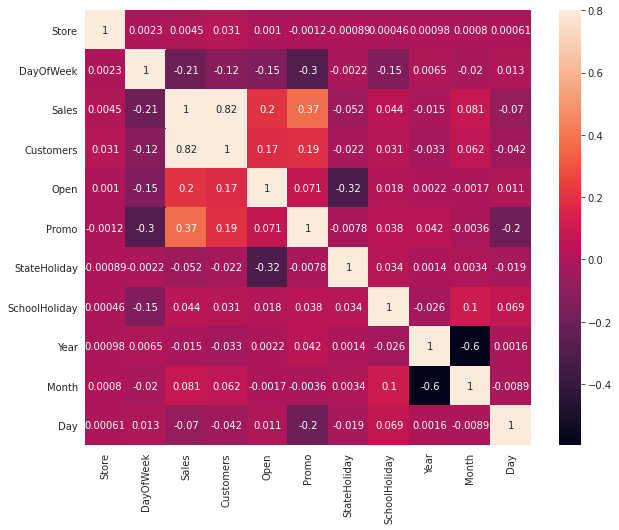

In [ ]:
corr = xdf.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True)

# Exploratory Data Analaysis

In [ ]:
xdf['Open'].value_counts()

1    302585
0      2578
Name: Open, dtype: int64

## Univariate (Target Attribute)

In [ ]:
xdf['Customers'].value_counts()

0       2578
560      888
576      853
566      853
539      850
        ... 
3531       1
4297       1
3674       1
3530       1
3640       1
Name: Customers, Length: 3643, dtype: int64

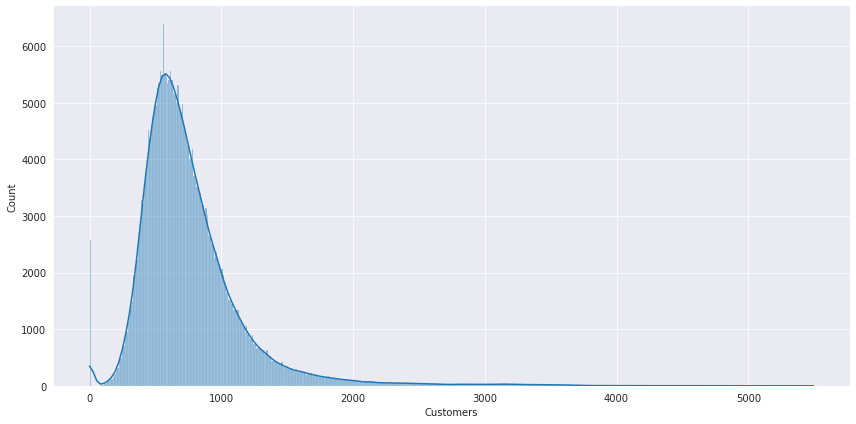

In [ ]:
## Lets check its distribution

sns.displot(x = 'Customers', data = xdf, aspect = 2, height = 6, kde = True);

In [ ]:
# Skew and kurt
print("Skewness: %f" % xdf['Customers'].skew())
print("Kurtosis: %f" % xdf['Customers'].kurt())

Skewness: 2.670399
Kurtosis: 12.614082


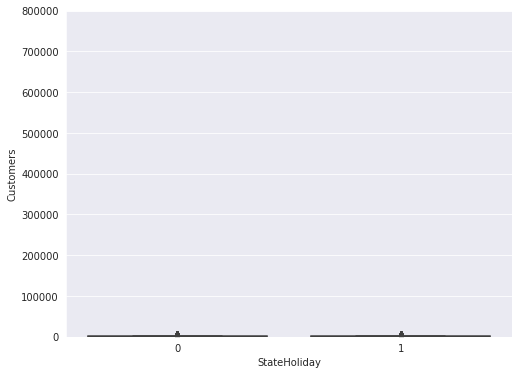

In [ ]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Customers'], xdf['StateHoliday']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['StateHoliday'], y="Customers", data=data)
fig.axis(ymin=0, ymax=800000);

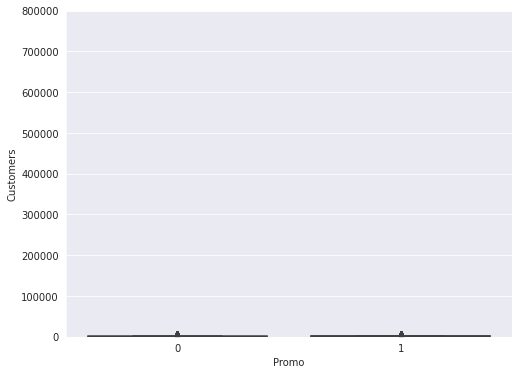

In [ ]:
# Let's plot how Sales relates to some of the features in the dataset

data = pd.concat([xdf['Customers'], xdf['Promo']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=xdf['Promo'], y="Customers", data=data)
fig.axis(ymin=0, ymax=800000);

# Feature Engineering

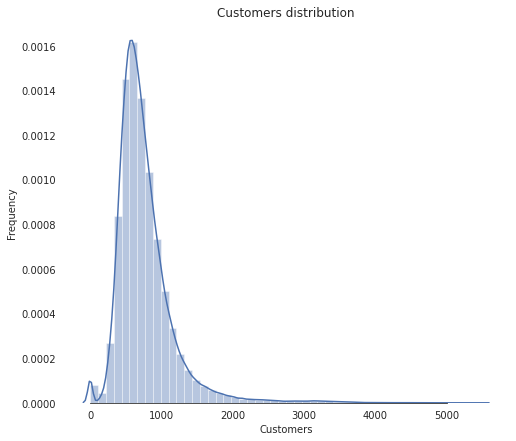

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Customers'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Customers")
ax.set(title="Customers distribution")
sns.despine(trim=True, left=True)
plt.show()

The Sales is skewed to the right. This is a problem because most ML models don't do well with non-normally distributed data. We can apply a log(1+x) transform to fix the skew.

In [ ]:
from scipy.stats import skew, norm
import scipy.stats as stats

In [ ]:
xdf['Customers'].value_counts()

0       2578
560      888
576      853
566      853
539      850
        ... 
3531       1
4297       1
3674       1
3530       1
3640       1
Name: Customers, Length: 3643, dtype: int64

In [ ]:
xdf['Customers'] = np.log1p(xdf['Customers'])


 mu = 6.49 and sigma = 0.74



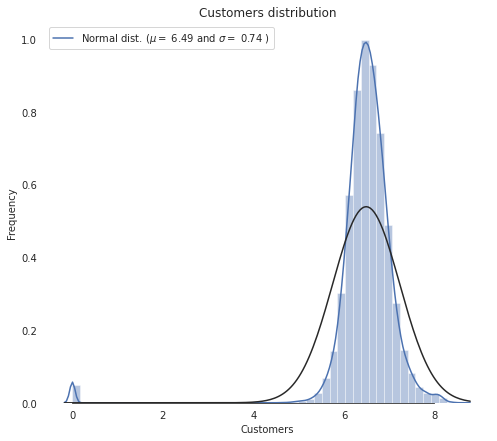

In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(xdf['Customers'] , fit=norm, color="b");

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(xdf['Customers'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Customers")
ax.set(title="Customers distribution")
sns.despine(trim=True, left=True)

plt.show()

In [ ]:
xdf.shape

(305163, 11)

## Correlation

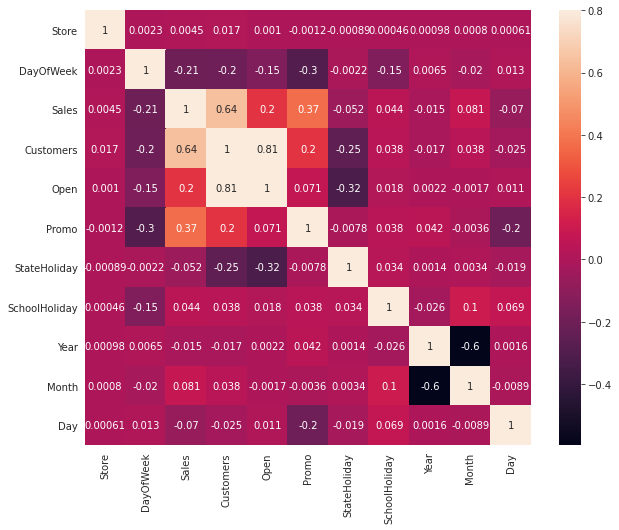

In [ ]:
# Let's check the correlation of the feature with target

corr = xdf.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True);

In [ ]:
xdf.drop(['Sales','DayOfWeek','StateHoliday'], axis = 1, inplace = True)

In [ ]:
df_test.drop(['DayOfWeek','StateHoliday'], axis = 1, inplace = True)

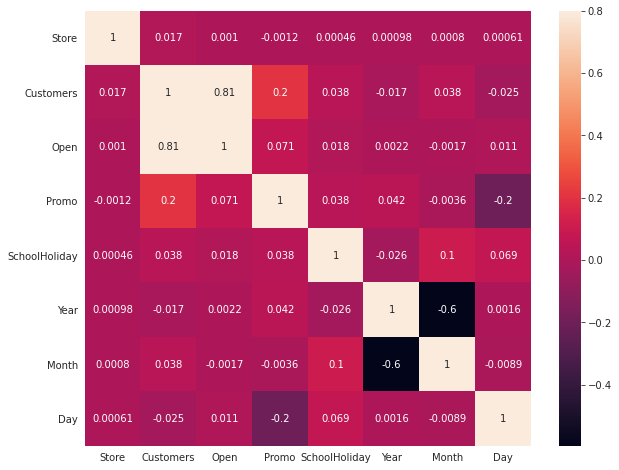

In [ ]:
# Let's check the correlation of the feature with target

corr = xdf.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, vmax = .8, annot = True);

#### Fix skewed features

# Dataset Preparation

In [ ]:
# Splitting the dataset

X = xdf.drop(['Customers'], axis =1)
y = xdf['Customers']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
(X_train.shape, X_test.shape)

((274646, 7), (30517, 7))

In [ ]:
X_train

,Store,Open,Promo,SchoolHoliday,Year,Month,Day
358228,359,1,0,0,2014,8,23
523900,636,1,1,0,2014,3,19
23713,299,1,0,0,2015,7,10
313543,589,1,1,0,2014,10,10
703565,786,1,1,0,2013,10,9
...,...,...,...,...,...,...,...
459536,942,1,0,0,2014,5,16
206850,576,1,1,0,2015,1,27
602666,237,1,1,0,2014,1,7
287311,527,1,1,0,2014,11,7


In [ ]:
df_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day
0,767,0,0,1,2013,4,1
1,1111,1,0,0,2013,3,16
2,45,1,1,1,2013,8,1
3,500,1,0,1,2013,5,23
4,82,1,0,1,2013,8,6
...,...,...,...,...,...,...,...
305158,412,1,1,1,2013,5,28
305159,936,1,0,0,2013,3,2
305160,21,1,0,0,2013,9,16
305161,1077,1,0,0,2013,6,22


### Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ct = ColumnTransformer([
                ('scaler', StandardScaler(),['Store','Month','Day'])
], remainder = 'passthrough')

# Modeling and Evaluation Metrics

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import math

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr_pipe = Pipeline([
            ('column-transformer', ct),
            ('LinearRegression', lr)
])

In [ ]:
lr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column-transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Store', 'Month', 'Day'])],
                                   verbose=False)),
                ('LinearRegression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
lr_pred = lr_pipe.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, lr_pred))
print("Mean Squarred Error: %.3f" % mean_squared_error(y_test, lr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, lr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,lr_pred)))

R2 Score: 0.677528368062964
Mean Squarred Error: 0.175
RMSE: 0.4182784423561084
Mean Absolute Error : 0.3182166337820209


## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
gbr = GradientBoostingRegressor()

In [ ]:
gbr_pipe = Pipeline([
            ('column-transformer', ct),
            ('GradientBoostingRegressor', gbr)
])

In [ ]:
gbr_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('column-transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Store', 'Month', 'Day'])],
                                   verbose=False)),
                ('GradientBoostingRegressor',
                 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_n

In [ ]:
gbr_pred = gbr_pipe.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, gbr_pred))
print("Mean Squarred Error:", mean_squared_error(y_test, gbr_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, gbr_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,gbr_pred)))

R2 Score: 0.7200656877519986
Mean Squarred Error: 0.15187824950195147
RMSE: 0.38971560079364476
Mean Absolute Error : 0.29945111797113


## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators = 100, learning_rate = 0.05)
xgb_pipe = Pipeline([
            ('column-transformer', ct),
            ('XGBRegression', xgb)
])

In [ ]:
xgb_pipe.fit(X_train, y_train)

[04:57:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('column-transformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Store', 'Month', 'Day'])],
                                   verbose=False)),
                ('XGBRegression',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.05,
                 

In [ ]:
xgb_pred = xgb_pipe.predict(X_test)

In [ ]:
print("R2 Score:", r2_score(y_test, xgb_pred))
print("Mean Squarred Error: %.3f " % mean_squared_error(y_test, xgb_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, xgb_pred)))
print("Mean Absolute Error : " + str(mean_absolute_error(y_test,xgb_pred)))

R2 Score: 0.691569878111421
Mean Squarred Error: 0.167 
RMSE: 0.4090704580647829
Mean Absolute Error : 0.3113254043452319


In [ ]:
X_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day
346719,10,1,1,1,2014,9,4
18905,1066,1,1,1,2015,7,15
70899,655,1,0,0,2015,5,29
47080,251,1,1,0,2015,6,19
192676,897,1,0,0,2015,2,9
...,...,...,...,...,...,...,...
80724,445,1,1,0,2015,5,20
565982,348,0,0,0,2014,2,9
386584,729,1,0,1,2014,7,24
541480,376,1,1,0,2014,3,3


In [ ]:
df_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day
0,767,0,0,1,2013,4,1
1,1111,1,0,0,2013,3,16
2,45,1,1,1,2013,8,1
3,500,1,0,1,2013,5,23
4,82,1,0,1,2013,8,6
...,...,...,...,...,...,...,...
305158,412,1,1,1,2013,5,28
305159,936,1,0,0,2013,3,2
305160,21,1,0,0,2013,9,16
305161,1077,1,0,0,2013,6,22


In [ ]:
output = pd.DataFrame(columns = ['Index','Customers'])

In [ ]:
output['Index'] = df_test.index

In [ ]:
df_test['Customers'] = np.floor(np.expm1(gbr_pipe.predict(df_test)))

In [ ]:
df_test['Customers'].value_counts()

0.0       47910
620.0      4189
628.0      3872
629.0      3562
619.0      3361
          ...  
1204.0        1
460.0         1
2175.0        1
1328.0        1
1484.0        1
Name: Customers, Length: 911, dtype: int64

In [ ]:
df_test

,Store,Open,Promo,SchoolHoliday,Year,Month,Day,Customers
0,767,0,0,1,2013,4,1,0.0
1,1111,1,0,0,2013,3,16,484.0
2,45,1,1,1,2013,8,1,729.0
3,500,1,0,1,2013,5,23,662.0
4,82,1,0,1,2013,8,6,619.0
...,...,...,...,...,...,...,...,...
305158,412,1,1,1,2013,5,28,775.0
305159,936,1,0,0,2013,3,2,644.0
305160,21,1,0,0,2013,9,16,581.0
305161,1077,1,0,0,2013,6,22,627.0


In [ ]:
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
329551,731,2,2014-09-23,6933,844,1,0,0,0
607465,576,5,2014-01-03,5443,887,1,0,0,1
109865,596,5,2015-04-24,3657,646,1,0,0,0
457,458,5,2015-07-31,9276,779,1,1,0,1
419030,576,6,2014-06-21,6073,905,1,0,0,0
...,...,...,...,...,...,...,...,...,...
411525,876,6,2014-06-28,2847,343,1,0,0,0
62865,426,5,2015-06-05,6386,700,1,1,0,0
123813,49,6,2015-04-11,7352,576,1,0,0,0
2985,756,3,2015-07-29,16762,2162,1,1,0,1


In [ ]:
output['Customers'].apply(numpy_isqrt)

0         3.010362e-01
1         7.668051e-06
2         8.437948e-07
3         2.281446e-06
4         3.370716e-06
              ...     
305158    7.201448e-07
305159    2.486342e-06
305160    3.586433e-06
305161    2.716484e-06
305162    3.091862e-06
Name: Customers, Length: 305163, dtype: float64

In [ ]:
df_test['Customers'] = np.floor(np.expm1(xgb_pipe.predict(df_test)))

SyntaxError: ignored

In [ ]:
df_train[df_train['Open']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
710580,1111,4,2013-10-03,0,0,0,0,a,0
710581,1112,4,2013-10-03,0,0,0,0,a,0
710582,1113,4,2013-10-03,0,0,0,0,a,0
710583,1114,4,2013-10-03,0,0,0,0,a,1


In [ ]:
df_test[df_test['Open'] == 0]

,Store,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Customers
0,767,0,0,1,1,2013,4,1,0.0
5,402,0,0,0,0,2013,2,17,0.0
7,255,0,0,0,0,2013,4,14,0.0
22,137,0,0,0,0,2013,4,14,0.0
29,22,0,0,0,0,2013,4,14,0.0
...,...,...,...,...,...,...,...,...,...
305106,213,0,0,0,0,2013,1,27,0.0
305115,320,0,0,0,0,2013,4,7,0.0
305128,915,0,0,0,0,2013,3,17,0.0
305138,857,0,0,0,0,2013,1,20,0.0


In [ ]:
df_test.to_csv('custom_df_test.csv', index = False)

In [ ]:
mysub= pd.read_csv('customers.csv')

In [ ]:
mysub

,Index,Customers
0,0,0.0
1,1,516.0
2,2,748.0
3,3,625.0
4,4,595.0
...,...,...
305158,305158,745.0
305159,305159,619.0
305160,305160,584.0
305161,305161,612.0
